In [8]:
from orbit.utils.dataset import load_iclaims
from orbit.models.dlt import DLT
from orbit.diagnostics.plot import plot_predicted_data
import pandas as pd

df = pd.read_csv('data.csv')
df.shape

(21600, 4)

In [9]:
from datetime import datetime, timedelta, date
import datetime

def generate_datetime_list(start_date, n):
    start_datetime = date(2024, 1, 1)
    datetime_list = [start_datetime + timedelta(days=i) for i in range(n)]
    return datetime_list

# Example usage
start_date = "2024-01-10"
n = 21600  # Number of datetimes you want
datetime_list = generate_datetime_list(start_date, n)
for dt in datetime_list:
    print(dt)


2024-01-01
2024-01-02
2024-01-03
2024-01-04
2024-01-05
2024-01-06
2024-01-07
2024-01-08
2024-01-09
2024-01-10
2024-01-11
2024-01-12
2024-01-13
2024-01-14
2024-01-15
2024-01-16
2024-01-17
2024-01-18
2024-01-19
2024-01-20
2024-01-21
2024-01-22
2024-01-23
2024-01-24
2024-01-25
2024-01-26
2024-01-27
2024-01-28
2024-01-29
2024-01-30
2024-01-31
2024-02-01
2024-02-02
2024-02-03
2024-02-04
2024-02-05
2024-02-06
2024-02-07
2024-02-08
2024-02-09
2024-02-10
2024-02-11
2024-02-12
2024-02-13
2024-02-14
2024-02-15
2024-02-16
2024-02-17
2024-02-18
2024-02-19
2024-02-20
2024-02-21
2024-02-22
2024-02-23
2024-02-24
2024-02-25
2024-02-26
2024-02-27
2024-02-28
2024-02-29
2024-03-01
2024-03-02
2024-03-03
2024-03-04
2024-03-05
2024-03-06
2024-03-07
2024-03-08
2024-03-09
2024-03-10
2024-03-11
2024-03-12
2024-03-13
2024-03-14
2024-03-15
2024-03-16
2024-03-17
2024-03-18
2024-03-19
2024-03-20
2024-03-21
2024-03-22
2024-03-23
2024-03-24
2024-03-25
2024-03-26
2024-03-27
2024-03-28
2024-03-29
2024-03-30
2024-03-31

In [10]:
df.t = datetime_list
df.t = pd.to_datetime(df.t)

In [11]:
df = df.iloc[:2000]

In [12]:
df.dtypes

t    datetime64[ns]
x           float64
y           float64
z           float64
dtype: object

In [13]:
(df.t.iloc[:-1].reset_index(drop=True) - df.t.iloc[1:].reset_index(drop=True)).value_counts()

t
-1 days    1999
Name: count, dtype: int64

2024-03-18 00:54:51 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


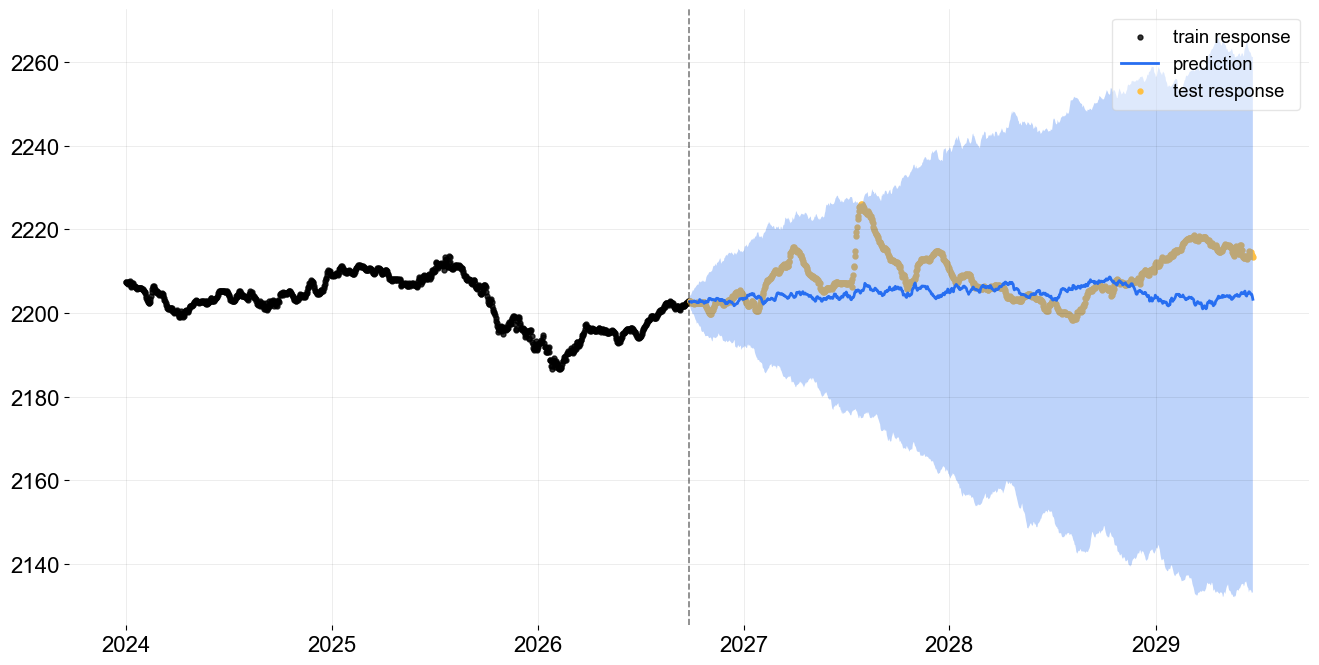

<AxesSubplot: >

In [15]:
date_col = 't'
response_col = 'y'
df.dtypes
# train-test split
test_size = 1000
train_df = df[:-test_size]
test_df = df[-test_size:]

ets = DLT(
    response_col=response_col,
    date_col=date_col,
    seasonality=52,
    seed=2024,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)
ets.fit(df=train_df)

predicted_df = ets.predict(df=test_df)

plot_predicted_data(
    training_actual_df=train_df, predicted_df=predicted_df,
    date_col=ets.date_col, actual_col=ets.response_col,
    test_actual_df=test_df
)